In [1]:
import walk
from experiment import MultipleExperiment
import tests
import fitter
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def wf(weight):
    return 1 + 1/weight

test2 = MultipleExperiment(walk.SelfInteractingRandomWalk, n_trials=10000, length=10000, chunk_size=100, weight_function=wf)
test2.run()

100%|██████████| 10000/10000 [28:34<00:00,  5.83it/s]


[0.36089176]
`ftol` termination condition is satisfied.


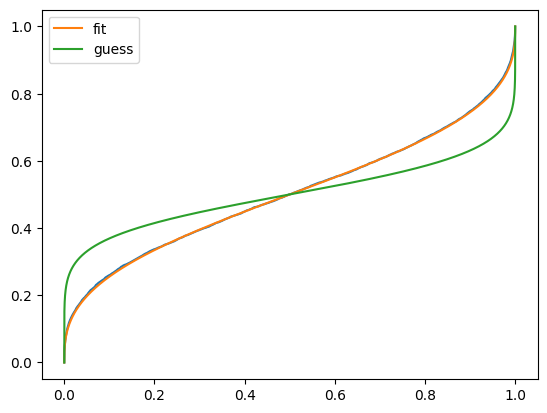

In [3]:
f2 = fitter.BetaFitter(test2.stats['ta0'])
f2.fit([0.15], 'trf')
f2.plot(100)

In [4]:
df = pd.DataFrame(f2.y)
df.head()

,0
0,0.0000
1,0.0266
2,0.0296
3,0.0339
4,0.0369


In [5]:
df.index = f2.x
df.head()

,0
0.0000,0.0000
0.0001,0.0266
0.0002,0.0296
0.0003,0.0339
0.0004,0.0369


In [8]:
df.to_csv('1+w^-110k10k')